# Đọc dữ liệu

In [706]:
%pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [707]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Yêu cầu 1.3

In [708]:
data = pd.read_csv('data/train_mode.csv')

In [709]:
print('Số dòng:', data.shape[0])
print('Các cột:')
print(np.array(data.columns))

Số dòng: 1647
Các cột:
['Make' 'Model' 'Price' 'Year' 'Kilometer' 'Fuel Type' 'Transmission'
 'Location' 'Color' 'Owner' 'Seller Type' 'Engine' 'Drivetrain' 'Length'
 'Width' 'Height' 'Seating Capacity' 'Fuel Tank Capacity' 'Max Power BHP'
 'Max Power RPM' 'Max Torque Nm' 'Max Torque RPM']


In [710]:
print('5 Dòng đầu tiên của data:')
data.head()

5 Dòng đầu tiên của data:


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max Power BHP,Max Power RPM,Max Torque Nm,Max Torque RPM
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,...,FWD,3995.0,1695.0,1475.0,5.0,35.0,89.0,4000.0,200.0,1750.0
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,...,RWD,4454.0,2044.0,1545.0,5.0,63.0,184.0,4000.0,350.0,1750.0
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,...,FWD,4585.0,1890.0,1785.0,7.0,70.0,138.0,3750.0,320.0,1600.0
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,...,AWD,5207.0,2157.0,1823.0,7.0,90.0,326.0,3600.0,700.0,1200.0
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,...,RWD,4795.0,1855.0,1835.0,7.0,80.0,174.0,3400.0,450.0,1600.0


# Data preprocessing

## Encoding categorical features

In [711]:
list(data.select_dtypes(include=['object']).columns)

['Make',
 'Model',
 'Fuel Type',
 'Transmission',
 'Location',
 'Color',
 'Owner',
 'Seller Type',
 'Drivetrain']

In [712]:
# Model (drop)
data.drop(columns=['Model'], inplace=True)

In [713]:
# Location (binary encoding)
from category_encoders import BinaryEncoder
Location_encoder= BinaryEncoder(cols=['Location'],return_df=True) # Giữ lại để encoder cho bên test
data = Location_encoder.fit_transform(data)

In [714]:
# Make (binary encoding)
Make_encoder= BinaryEncoder(cols=['Make'],return_df=True) # Giữ lại để encoder cho bên test
data = Make_encoder.fit_transform(data)

In [715]:
# Color (one-hot encoding)
Color_encoder= BinaryEncoder(cols=['Color'],return_df=True) # Giữ lại để encoder cho bên test
data = Color_encoder.fit_transform(data)

In [716]:
# Fule type (one-hot encoding)
data = pd.get_dummies(data, columns=["Fuel Type"], drop_first=True)

In [717]:
# Owner (Ordinal encoding)
# Giữ lại để encode cho bên test
Owner_dict = {
    "UnRegistered Car": 0,
    "First": 1,
    "Second": 2,
    "Third": 3,
    "Fourth": 4,
    "4 or More": 4
}
data["Owner"] = data["Owner"].map(Owner_dict)

In [718]:
# Drivetrain (one-hot encoding)
data = pd.get_dummies(data, columns=["Drivetrain"], drop_first=True)

In [719]:
# Transmission (one-hot encoding)
data = pd.get_dummies(data, columns=["Transmission"], drop_first=True)

In [720]:
# Color (one-hot encoding)
data = pd.get_dummies(data, columns=["Seller Type"], drop_first=True)

In [721]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make_0                  1647 non-null   int64  
 1   Make_1                  1647 non-null   int64  
 2   Make_2                  1647 non-null   int64  
 3   Make_3                  1647 non-null   int64  
 4   Make_4                  1647 non-null   int64  
 5   Price                   1647 non-null   int64  
 6   Year                    1647 non-null   int64  
 7   Kilometer               1647 non-null   int64  
 8   Location_0              1647 non-null   int64  
 9   Location_1              1647 non-null   int64  
 10  Location_2              1647 non-null   int64  
 11  Location_3              1647 non-null   int64  
 12  Location_4              1647 non-null   int64  
 13  Location_5              1647 non-null   int64  
 14  Location_6              1647 non-null   

# Visualizing

## Hiển thị các Correlation có abs > 0.3

In [722]:
# drop Kilometer = 2e6
data = data.drop(data[data["Kilometer"] == 2e6].index)

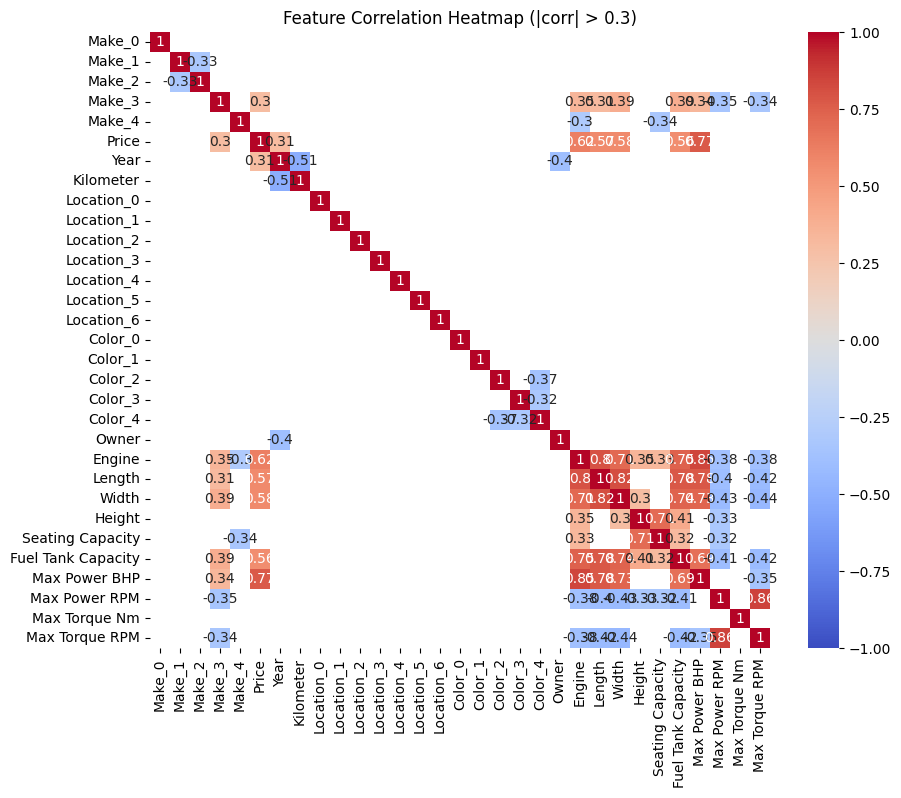

In [723]:
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation
corr_matrix = numeric_data.corr()
filtered_corr = corr_matrix[abs(corr_matrix) > 0.3]
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True)
plt.title("Feature Correlation Heatmap (|corr| > 0.3)")
plt.show()

# Visualize từng biến với Price

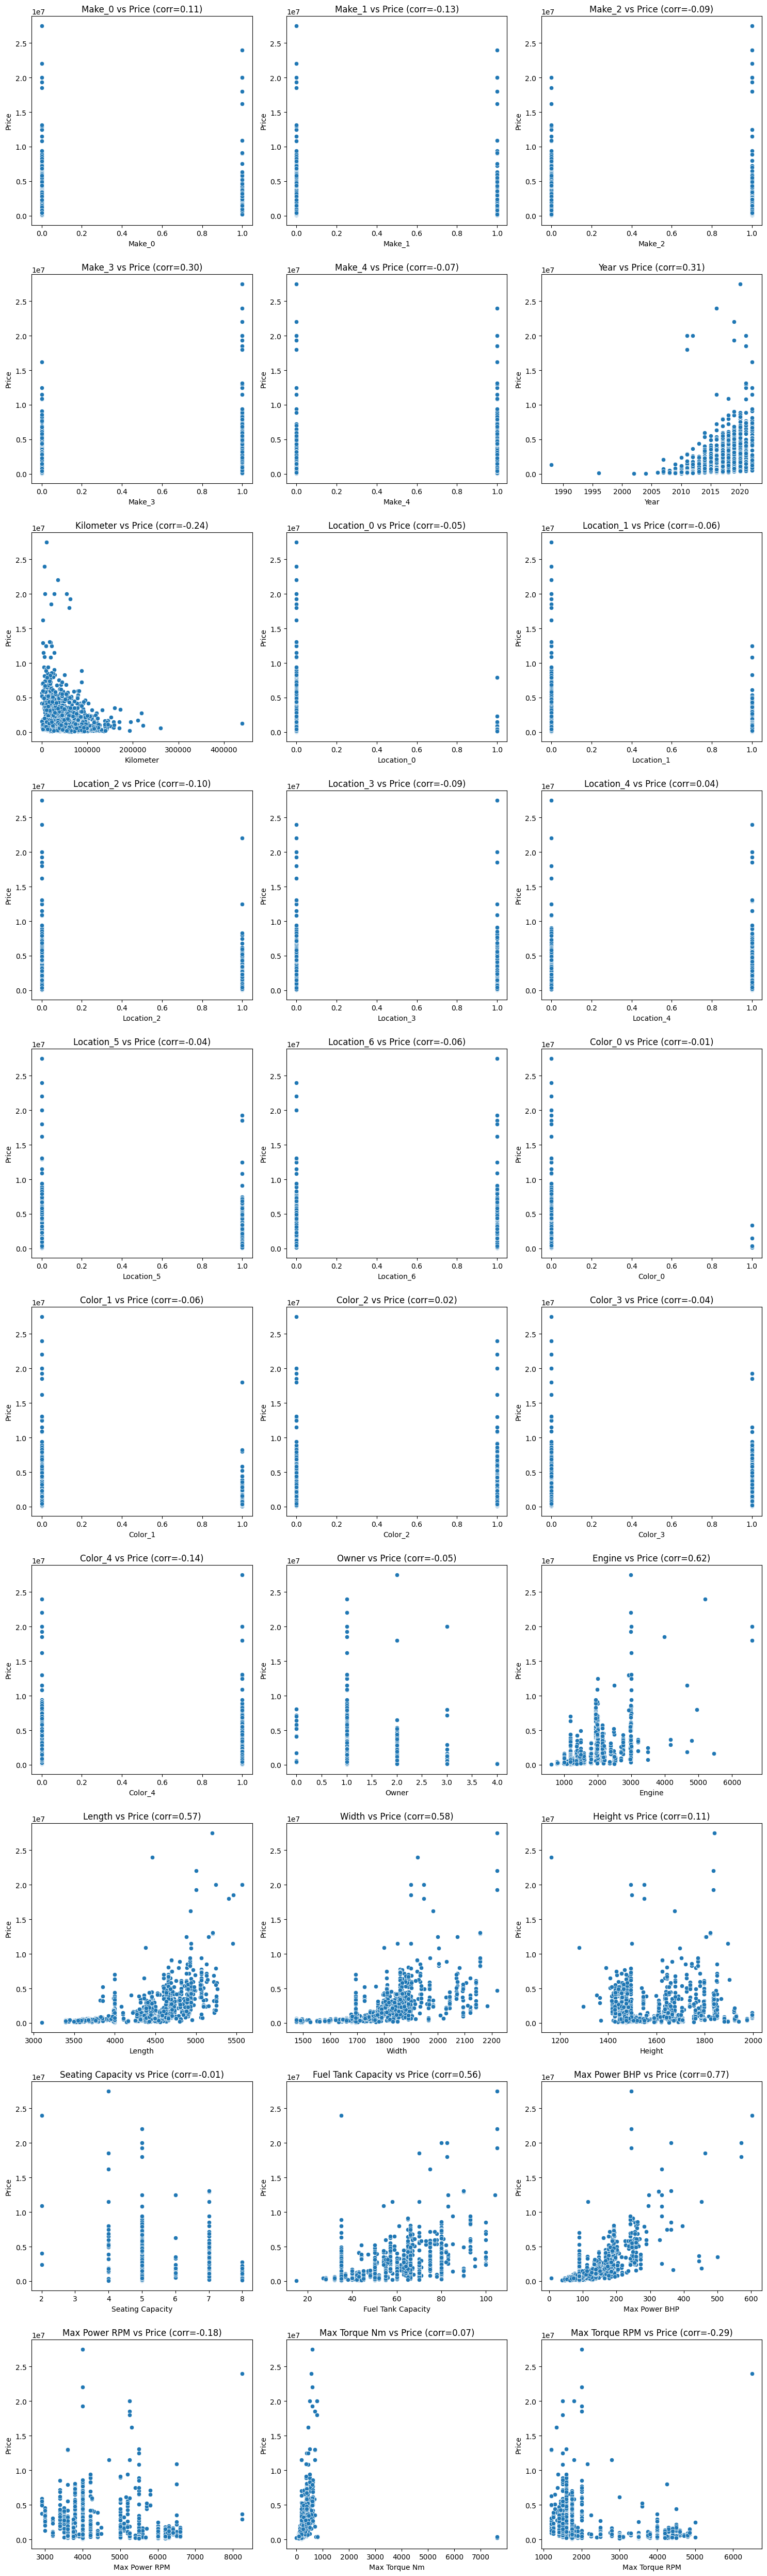

In [724]:
import math
correlations = numeric_data.corr()["Price"]
num_cols = [col for col in numeric_data.columns if col != "Price"]

num_plots = len(num_cols)
cols_per_row = 3  
num_rows = math.ceil(num_plots / cols_per_row) 

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5 * cols_per_row, 5 * num_rows))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    corr_value = correlations[col]
    sns.scatterplot(x=numeric_data[col], y=numeric_data["Price"], ax=axes[i])
    axes[i].set_title(f"{col} vs Price (corr={corr_value:.2f})")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Price")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()